Task 1: Data Preparation and Customer Analytics

In this task, the objective is to analyze the client's transaction dataset to unveil customer purchasing behaviors, extract valuable insights, and provide actionable commercial recommendations. This analysis sets the foundation for presenting a strategic recommendation to Julia, supporting it with data for the upcoming category review. The primary focus is on understanding current purchasing trends and behaviors, with a specific interest in customer segments and their chip purchasing patterns.

Background Information:

To facilitate strategic recommendations, a thorough analysis of the data is essential. This includes investigating the transaction dataset for missing data, anomalies, outliers, and cleaning them. Similar scrutiny will be applied to customer data to ensure a comprehensive understanding.

Main Goals:

Examine Transaction Data: Identify and rectify missing data, anomalies, and outliers within the transaction dataset to ensure data integrity.

Examine Customer Data: Apply a similar scrutiny process to the customer data, addressing missing values and anomalies.

Data Analysis and Customer Segments: Utilize charts and graphs to visually represent data, identifying trends and extracting meaningful insights.

Deep Dive into Customer Segments: Determine which customer segments exhibit distinct behaviors and should be targeted for strategic initiatives.

By accomplishing these goals, we aim to provide Julia with a well-informed strategic recommendation backed by data-driven insights, fostering effective decision-making for the upcoming category review.

In [3]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Reading the transaction data from the specified Excel file
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

# Displaying the first few rows of the transaction data
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Descriptive statistics of the transaction data
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
# Importing the purchase behavior data from the specified CSV file
purchase_behavior = pd.read_csv("QVI_purchase_behaviour.csv")

# Displaying the first few rows of the purchase behavior data
purchase_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
# Descriptive statistics of the purchase behavior data
purchase_behavior.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [7]:
# Counting the number of missing values in each column of the transaction data
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
# Counting the number of missing values in each column of the purchase behavior data
purchase_behavior.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [9]:
# Checking and removing outliers by merging the purchase behavior data with the transaction data:

# Merging the purchase behavior data with the transaction data based on 'LYLTY_CARD_NBR'
merged_data = pd.merge(purchase_behavior, transaction_data, on='LYLTY_CARD_NBR', how='right')

# Displaying the first few rows of the merged dataset
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
# Print the length of the merged dataset
print(len(merged_data))

# Print the length of the original transaction data
print(len(transaction_data))

264836
264836


In [11]:
# Displaying information about the merged dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [12]:
#Converting the "DATE" column to datetime format:

from datetime import date, timedelta

# Start date for Excel date format
start = date(1899, 12, 30)

# Convert Excel date format to datetime format
new_date_format = []
for excel_date in merged_data["DATE"]:
    delta = timedelta(days=excel_date)
    new_date_format.append(start + delta)

# Update the "DATE" column with the new datetime format
merged_data["DATE"] = pd.to_datetime(pd.Series(new_date_format))

# Check the data type of the updated "DATE" column
print(merged_data["DATE"].dtype)

datetime64[ns]


In [13]:
# Checking the unique values in the "PROD_NAME" column
merged_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [14]:
# Processing and counting the words in the "PROD_NAME" column:
# Cleaning and splitting the words in the "PROD_NAME" column
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])', '').str.replace(r'[^\w]', ' ').str.split()

# Counting the occurrences of each word
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1

# Applying the count_words function using the lambda function
split_prods.apply(lambda line: count_words(line))

# Displaying the word counts in descending order
print(pd.Series(word_counts).sort_values(ascending=False))

C:\Users\nikhi\AppData\Local\Temp\ipykernel_5688\671508697.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])', '').str.replace(r'[^\w]', ' ').str.split()


Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


In [15]:
# Displaying descriptive statistics of the merged dataset
print(merged_data.describe(), '\n')

# Displaying information about the merged dataset
print(merged_data.info())

       LYLTY_CARD_NBR     STORE_NBR        TXN_ID       PROD_NBR  \
count    2.648360e+05  264836.00000  2.648360e+05  264836.000000   
mean     1.355495e+05     135.08011  1.351583e+05      56.583157   
std      8.057998e+04      76.78418  7.813303e+04      32.826638   
min      1.000000e+03       1.00000  1.000000e+00       1.000000   
25%      7.002100e+04      70.00000  6.760150e+04      28.000000   
50%      1.303575e+05     130.00000  1.351375e+05      56.000000   
75%      2.030942e+05     203.00000  2.027012e+05      85.000000   
max      2.373711e+06     272.00000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  
mean        1.907309       7.304200  
std         0.643654       3.083226  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max       200.000000     650.000000   

<class 'pandas.core.frame.DataFrame'>
Int64

In [16]:
# Counting the occurrences of different values in the "PROD_QTY" column, grouped into 4 bins
merged_data["PROD_QTY"].value_counts(bins=4).sort_index()

(0.8, 50.75]       264834
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

Based on the binning, it is observed that there are "PROD_QTY" values above 50.75.

In [17]:
# Sorting the merged dataset by the "PROD_QTY" column in descending order
merged_data.sort_values(by="PROD_QTY", ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,201060,YOUNG FAMILIES,Premium,2019-05-18,201,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,219004,YOUNG SINGLES/COUPLES,Mainstream,2018-08-14,219,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,261331,YOUNG SINGLES/COUPLES,Mainstream,2019-05-19,261,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0


Removing two outliers with a value of 200 in the "PROD_QTY" column, both entries made by the same customer, for further examination

In [18]:
# Filtering the merged dataset to include only "PROD_QTY" values less than 6
merged_data = merged_data[merged_data["PROD_QTY"] < 6]

# Determining the length of entries for the specific customer (LYLTY_CARD_NBR 226000)
len(merged_data[merged_data["LYLTY_CARD_NBR"] == 226000])

0

In [19]:
# Descriptive summary of the "DATE" column in the merged dataset
merged_data["DATE"].describe()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_5688\3993583671.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_data["DATE"].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

Noting an inconsistency in the "DATE" column where there are only 364 unique values instead of the expected 365 for a year

In [20]:
# Generating a date range from the minimum to the maximum date and finding the difference
missing_dates = pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()).difference(merged_data["DATE"])

# Displaying the missing date
missing_dates

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

By utilizing the difference method, it is observed that the missing date in the dataset was 2018-12-25.

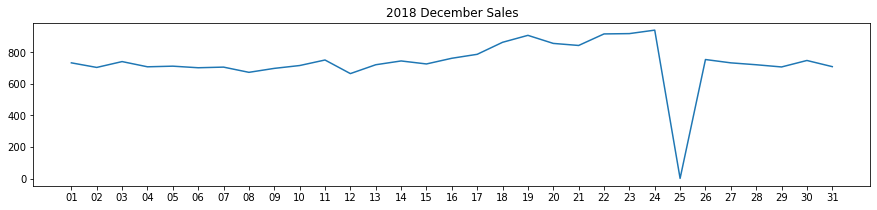

In [21]:
# Creating a date range from the minimum to the maximum date
date_range = pd.Series(pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()), name="DATE")

# Merging the date range with the merged dataset to check for null dates
check_null_date = pd.merge(date_range, merged_data, on="DATE", how="left")

# Counting transactions by date
trans_by_date = check_null_date["DATE"].value_counts()

# Extracting December transactions for 2018
december_sales = trans_by_date[(trans_by_date.index >= pd.to_datetime('2018-12-01')) & (trans_by_date.index < pd.to_datetime('2019-01-01'))].sort_index()

# Formatting the index to display only the day
december_sales.index = december_sales.index.strftime('%d')

# Plotting December 2018 sales
ax = december_sales.plot(figsize=(15, 3))
ax.set_xticks(np.arange(len(december_sales)))
ax.set_xticklabels(december_sales.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

In [23]:
# Counting occurrences of each date in the "DATE" column and displaying the top 5 with the least transactions
check_null_date["DATE"].value_counts().sort_values().head()

2018-12-25      1
2018-11-25    648
2018-10-18    658
2019-06-13    659
2019-06-24    662
Name: DATE, dtype: int64

The absence of transactions on Christmas day indicates that the store was closed on that day, and therefore, there is no anomaly in this observation.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_5688\1435337803.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)', 'g')


count    258770.000000
mean        182.324276
std          64.955035
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


<AxesSubplot:ylabel='Frequency'>

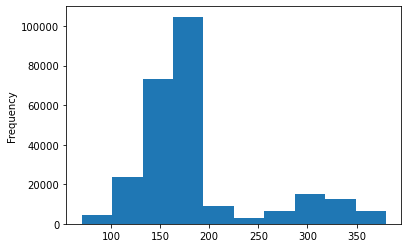

In [24]:
# Exploring packet sizes in the dataset:

# Modifying the "PROD_NAME" column to standardize units and extract packet sizes
merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)', 'g')
pack_sizes = merged_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g", "").astype("float")

# Displaying descriptive statistics of packet sizes
print(pack_sizes.describe())

# Plotting a histogram of packet sizes
pack_sizes.plot.hist()

In [25]:
# Extracting the first word from the "PROD_NAME" column, counting occurrences, and sorting the results
merged_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

Certain product names have variations in their representation, such as:

Dorito and Doritos
Grains and GrnWves
Infusions and Ifzns
Natural and NCC
Red and RRD
Smith and Smiths
Snbts and Sunbites

In [26]:
# Counting occurrences of product names starting with "Red" after splitting the words
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Red"].value_counts()

[Red, Rock, Deli, Sp, Salt, &, Truffle, g]        1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]        1495
[Red, Rock, Deli, SR, Salsa, &, Mzzrlla, 150g]    1458
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]      1434
Name: PROD_NAME, dtype: int64

<AxesSubplot:>

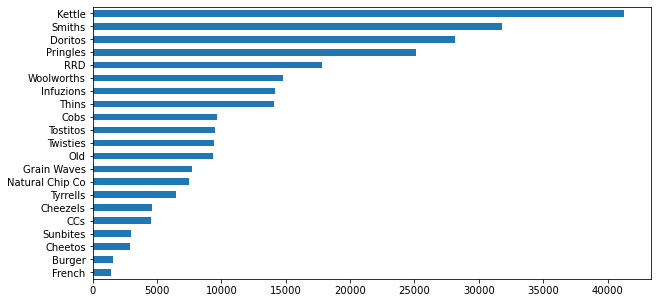

In [27]:
# Extracting the first word from the "PROD_NAME" column to create a new column
merged_data["Cleaned_Brand_Names"] = merged_data["PROD_NAME"].str.split().str[0]

# Function to clean and standardize brand names
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

# Applying the cleaning function to the dataframe
merged_data["Cleaned_Brand_Names"] = merged_data.apply(lambda line: clean_brand_names(line), axis=1)

# Plotting a horizontal bar chart of the cleaned brand names
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10, 5))

In [28]:
# Checking for null values in the merged dataset
merged_data.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
Cleaned_Brand_Names    0
dtype: int64

Analyzing customer spending on chips and segmenting customers:

    1.Identifying the customer segment that spends the most on chips (total sales) based on lifestage and premium purchasing behavior.
    2.Determining the number of customers in each segment.
    3.Calculating the chips bought per customer in each segment.
    4.Computing the average chip price by customer segment.

In [29]:
# Creating a DataFrame to analyze grouped sales by lifestage and premium customer
grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))

# Sorting the results by the sum of total sales in descending order
grouped_sales.sort_values(by="sum", ascending=False)

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Mainstream        155677.05  7.252262
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
                       Mainstream        133393.80  7.282116
                       Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Premium            97646.05  7.456174
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
NEW FAMILIES           Budget             21928.45  7.297321
                       Mainstream         17013.90  7.317806
                       Premium            11491.10  7.231655

In [30]:
# Calculating the total sum of sales from the grouped sales DataFrame
grouped_sales["sum"].sum()

1933115.0000000002

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

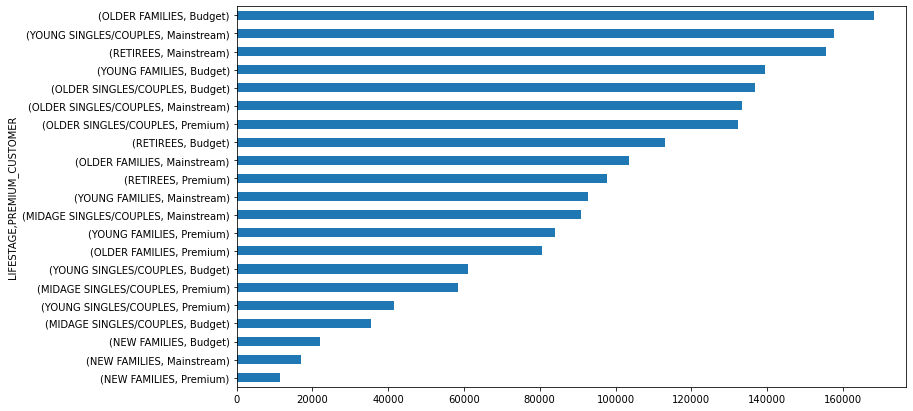

In [31]:
# Plotting a horizontal bar chart of the total sum of sales for each customer segment
grouped_sales["sum"].sort_values().plot.barh(figsize=(12, 7))

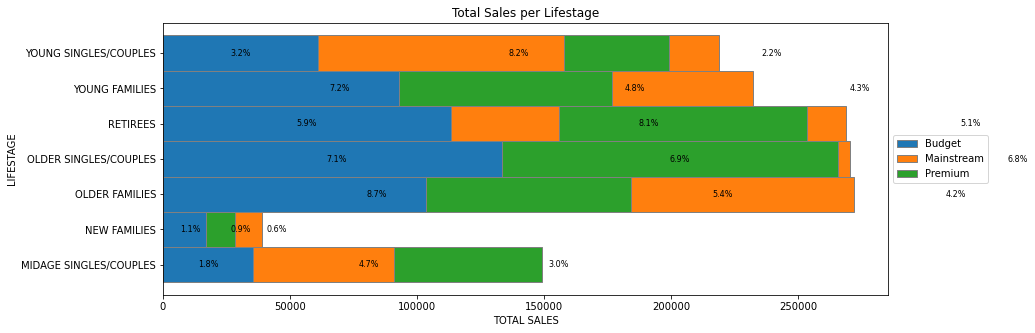

In [32]:
# Values of each group
bars1 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = grouped_sales[grouped_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]

bars1_text = (bars1 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(grouped_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(grouped_sales["sum"])).apply("{:.1%}".format)

# Names of group and bar width
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13, 5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the first ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
prem_bar = plt.barh(r, bars3, left=bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=8)

# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

In [33]:
# Grouping by LIFESTAGE and extracting the mode of PREMIUM_CUSTOMER
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()

# Displaying the top contributor per LIFESTAGE by PREMIUM category
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


The segments that contribute the most to total sales, ranked in order, are as follows:

    1.Older families (Budget) with total sales of $156,864.
    2.Young Singles/Couples (Mainstream) with total sales of $147,582.
    3.Retirees (Mainstream) with total sales of $145,169.

In [34]:
# Grouping by LIFESTAGE and PREMIUM_CUSTOMER and counting the number of unique LYLTY_CARD_NBR
unique_cust = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)

# Creating a DataFrame to display the results
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  8088
RETIREES               Mainstream                  6479
OLDER SINGLES/COUPLES  Mainstream                  4930
                       Budget                      4929
                       Premium                     4750
OLDER FAMILIES         Budget                      4675
RETIREES               Budget                      4454
YOUNG FAMILIES         Budget                      4017
RETIREES               Premium                     3872
YOUNG SINGLES/COUPLES  Budget                      3779
MIDAGE SINGLES/COUPLES Mainstream                  3340
OLDER FAMILIES         Mainstream                  2831
YOUNG FAMILIES         Mainstream                  2728
YOUNG SINGLES/COUPLES  Premium                     2574
YOUNG FAMILIES         Premium                     2433
MIDAGE SINGLES/COUPLES Premium                     2431
OLDER FAMILIES         Premium                     2273
MIDAGE SINGLES/COUPLES Budget                      1504
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

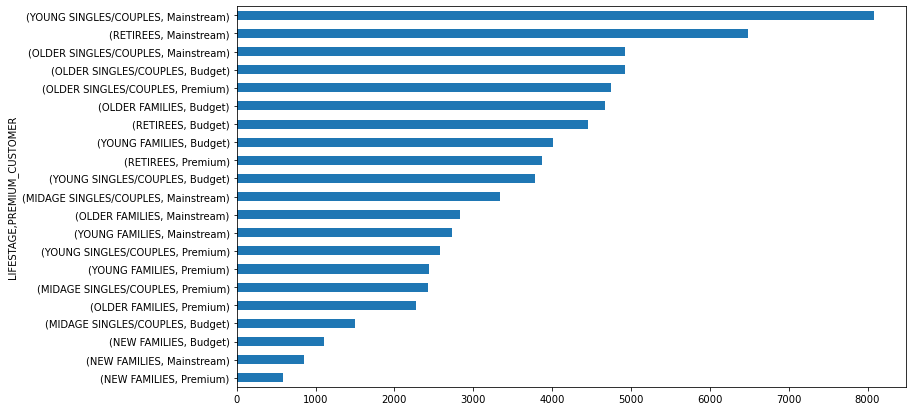

In [35]:
# Sorting the values and plotting a horizontal bar chart
unique_cust.sort_values().plot.barh(figsize=(12,7))

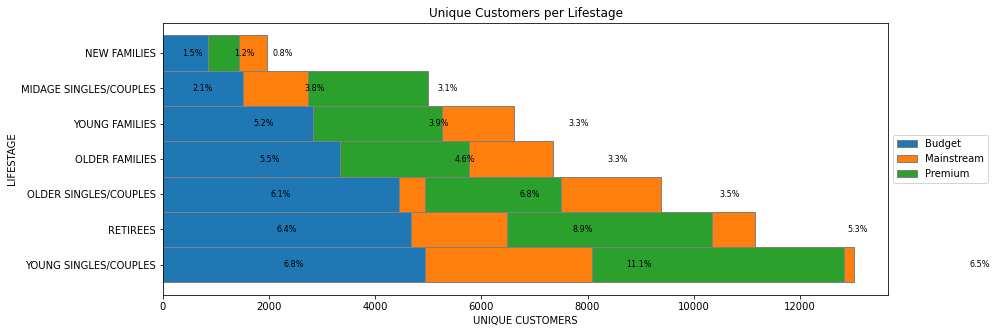

In [46]:
# Values of each group
ncust_bars1 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]
ncust_bars2 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]
ncust_bars3 = unique_cust[unique_cust.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]
 
ncust_bars1_text = (ncust_bars1 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / sum(unique_cust)).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / sum(unique_cust)).apply("{:.1%}".format)
 
# # Names of group and bar width
#names = unique_cust.index.get_level_values("LIFESTAGE").unique()

# # The position of the bars on the x-axis
#r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# # Create brown bars
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")
# # Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")
# # Create green bars (top)
prem_bar = plt.barh(r, ncust_bars3, left=ncust_bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, ncust_bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, ncust_bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, ncust_bars3_text[i], va='center', ha='center', size=8)

# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("UNIQUE CUSTOMERS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage")

plt.savefig("lifestage_customers.png", bbox_inches="tight")

# # Show graphic
plt.show()

The notable sales figures in the "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" segments can be attributed to their substantial unique customer base. However, the "Older - Budget" segment does not follow the same pattern. In the subsequent analysis, we will investigate whether the "Older - Budget" segment exhibits a high frequency of purchase and average sales per customer in comparison to the other segments.

In [48]:
# Calculate the frequency of purchases per customer
customer_frequency = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]

# Aggregate the results to find the mean and count for each LIFESTAGE and PREMIUM_CUSTOMER combination
customer_frequency.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        5.031438   2831
                       Budget            4.954011   4675
                       Premium           4.923009   2273
YOUNG FAMILIES         Budget            4.760269   4017
                       Premium           4.752569   2433
                       Mainstream        4.731305   2728
OLDER SINGLES/COUPLES  Premium           3.737684   4750
                       Budget            3.734429   4929
                       Mainstream        3.715619   4930
MIDAGE SINGLES/COUPLES Mainstream        3.555090   3340
RETIREES               Budget            3.412887   4454
                       Premium           3.382231   3872
MIDAGE SINGLES/COUPLES Premium           3.379679   2431
                       Budget            3.337766   1504
RETIREES               Mainstream        3.313166   6479
NEW FAMILIES           Mainstream        2.738516    849
                       Premium           2.702381    588
                       Budget            2.702338   1112
YOUNG SINGLES/COUPLES  Mainstream        2.578388   8088
                       Budget            2.445621   3779
                       Premium           2.440171   2574

The table above provides information on the "Average Purchase Frequency per segment" and "Number of Unique Customers per segment." The "Older Families" lifestage segment stands out as the top contributor to the most frequent purchases. It is evident that the "Older - Budget" segment contributes significantly to high sales due to a combination of:

    1.A high frequency of purchases, and
    2.A relatively high number of unique customers in the segment.

In [50]:
# Sorting the grouped sales DataFrame by the mean column in descending order
grouped_sales_sorted = grouped_sales.sort_values(ascending=False, by="mean")
grouped_sales_sorted

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Premium            97646.05  7.456174
OLDER SINGLES/COUPLES  Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
NEW FAMILIES           Mainstream         17013.90  7.317806
                       Budget             21928.45  7.297321
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Mainstream        133393.80  7.282116
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Mainstream        155677.05  7.252262
NEW FAMILIES           Premium            11491.10  7.231655
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
                       Budget             35514.80  7.074661
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
                       Budget             61141.60  6.615624

The Midage and Young "Singles/Couples" segments contribute the highest average spending per purchase. Although the distinction between their Mainstream and Non-Mainstream groups appears subtle (7.6 vs 6.6), we will investigate further to determine whether this difference is statistically significant.

In [51]:
from scipy.stats import ttest_ind

# Filter data for Mainstream, Young/Midage Singles/Couples
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

# Filter data for Budget and Premium customers
budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

# Extract sales data for Mainstream, Young/Midage Singles/Couples
a = merged_data[young_midage & mainstream]["TOT_SALES"]

# Extract sales data for Budget and Premium customers
b = merged_data[young_midage & budget_premium]["TOT_SALES"]

# Perform independent two-sample t-test with unequal variances
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

# Print p-value and check if it is less than 0.0000001
print(pval)
pval < 0.0000001

1.8542040107536954e-281


True

The p-value is approaching zero, indicating a statistically significant difference in Total Sales between the "Mainstream Young Midage" segment and the "Budget and Premium Young Midage" segment.

Now, let's investigate the preferred chip brands of the top 3 segments that contribute to Total Sales.

In [53]:
# Group the data by "LIFESTAGE" and "PREMIUM_CUSTOMER", then find the mode (most common brand) for each group
# Use apply() to extract the mode from the resulting Series and sort the values
brand_mode_per_segment = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].apply(lambda x: x.mode().iloc[0]).sort_values()
brand_mode_per_segment

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream          Kettle
OLDER SINGLES/COUPLES   Budget              Kettle
YOUNG SINGLES/COUPLES   Premium          

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle     838
Smiths     826
Doritos    570
Name: Cleaned_Brand_Names, dtype: int64


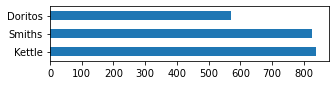

========== YOUNG SINGLES/COUPLES - Budget ==========
Smiths     1245
Kettle     1211
Doritos     899
Name: Cleaned_Brand_Names, dtype: int64


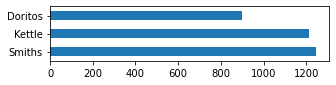

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2541
Pringles    2315
Name: Cleaned_Brand_Names, dtype: int64


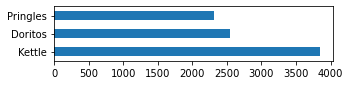

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle     1206
Smiths      986
Doritos     837
Name: Cleaned_Brand_Names, dtype: int64


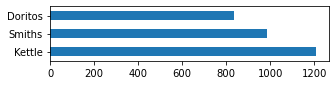

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     633
Doritos    533
Name: Cleaned_Brand_Names, dtype: int64


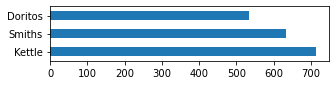

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1337
Doritos    1291
Name: Cleaned_Brand_Names, dtype: int64


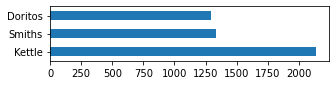

========== NEW FAMILIES - Premium ==========
Kettle      247
Doritos     167
Pringles    165
Name: Cleaned_Brand_Names, dtype: int64


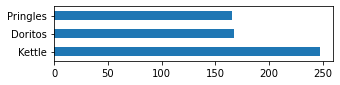

========== NEW FAMILIES - Budget ==========
Kettle     510
Doritos    343
Smiths     341
Name: Cleaned_Brand_Names, dtype: int64


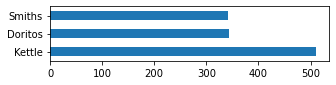

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    274
Smiths     254
Name: Cleaned_Brand_Names, dtype: int64


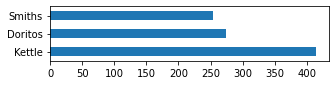

========== OLDER FAMILIES - Premium ==========
Smiths     1515
Kettle     1512
Doritos    1065
Name: Cleaned_Brand_Names, dtype: int64


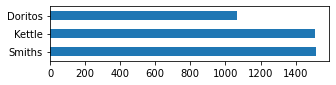

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     3093
Doritos    2351
Name: Cleaned_Brand_Names, dtype: int64


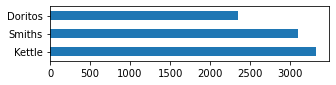

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1835
Doritos    1449
Name: Cleaned_Brand_Names, dtype: int64


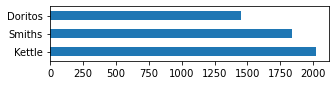

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     2042
Doritos    1958
Name: Cleaned_Brand_Names, dtype: int64


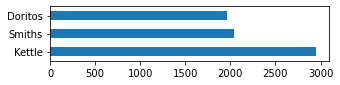

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle     3065
Smiths     2098
Doritos    1954
Name: Cleaned_Brand_Names, dtype: int64


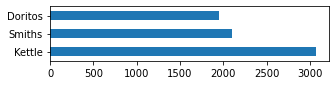

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2180
Doritos    2008
Name: Cleaned_Brand_Names, dtype: int64


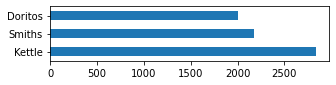

========== RETIREES - Premium ==========
Kettle     2216
Smiths     1458
Doritos    1409
Name: Cleaned_Brand_Names, dtype: int64


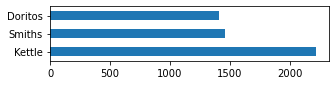

========== RETIREES - Budget ==========
Kettle     2592
Doritos    1742
Smiths     1679
Name: Cleaned_Brand_Names, dtype: int64


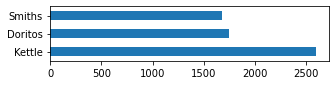

========== RETIREES - Mainstream ==========
Kettle     3386
Smiths     2476
Doritos    2320
Name: Cleaned_Brand_Names, dtype: int64


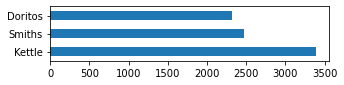

========== YOUNG FAMILIES - Premium ==========
Kettle     1745
Smiths     1442
Doritos    1129
Name: Cleaned_Brand_Names, dtype: int64


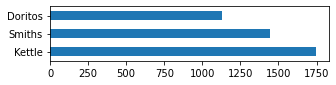

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2459
Doritos    1996
Name: Cleaned_Brand_Names, dtype: int64


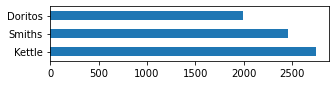

========== YOUNG FAMILIES - Mainstream ==========
Kettle     1789
Smiths     1772
Doritos    1309
Name: Cleaned_Brand_Names, dtype: int64


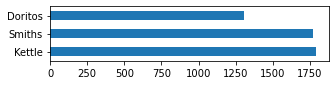

In [54]:
# Iterate through unique combinations of "LIFESTAGE" and "PREMIUM_CUSTOMER"
for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========', stage, '-', prem, '==========')
        
        # Filter data for the current combination of "LIFESTAGE" and "PREMIUM_CUSTOMER"
        filtered_data = merged_data[(merged_data["LIFESTAGE"] == stage) & (merged_data["PREMIUM_CUSTOMER"] == prem)]
        
        # Count the occurrences of cleaned brand names and display the top 3
        summary = filtered_data["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        
        # Plot a horizontal bar chart for visualization
        plt.figure()
        summary.plot.barh(figsize=(5, 1))
        plt.show()

In each segment, Kettle emerged as the top-purchased brand. With the exception of "YOUNG SINGLES/COUPLES Mainstream," Smiths secured the second position as the most-purchased brand across all other segments. Notably, "YOUNG SINGLES/COUPLES Mainstream" favored Doritos as their second most-purchased brand.

In [58]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Resetting index and renaming columns for clarity
temp = merged_data.reset_index().rename(columns={"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']

# Creating one-hot encoded dataframe for segments and cleaned brand names
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)

# Applying Apriori algorithm to find frequent itemsets
frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)

# Generating association rules based on lift metric
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

# Extracting rules related to unique segments
set_temp = temp["Segment"].unique()
segment_related_rules = rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]
segment_related_rules

C:\Users\nikhi\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(OLDER FAMILIES - Budget),(Smiths),0.087451,0.120162,0.011679,0.133549,1.111409,0.001171,1.015451,0.109848
2,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069504,0.155901,0.011573,0.166513,1.068064,0.000738,1.012731,0.068487
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067038,0.155901,0.011128,0.165991,1.064716,0.000676,1.012097,0.065150
6,(RETIREES - Mainstream),(Kettle),0.081055,0.155901,0.012785,0.157738,1.011779,0.000149,1.002180,0.012669
8,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155901,0.014515,0.184329,1.182344,0.002239,1.034852,0.167405


========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     961
175.0    1587
Name: Pack_Size, dtype: int64


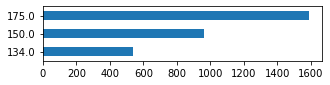

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1439
175.0    2262
Name: Pack_Size, dtype: int64


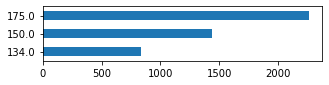

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    3159
175.0    4928
Name: Pack_Size, dtype: int64


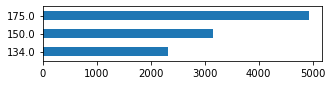

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1285
175.0    2034
Name: Pack_Size, dtype: int64


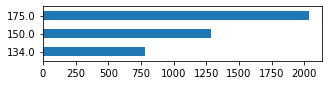

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     821
175.0    1256
Name: Pack_Size, dtype: int64


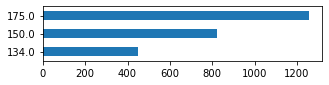

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1819
175.0    2912
Name: Pack_Size, dtype: int64


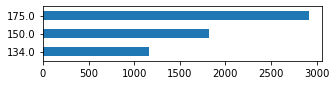

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    245
175.0    371
Name: Pack_Size, dtype: int64


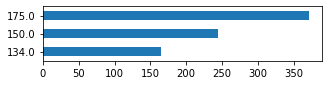

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    448
175.0    763
Name: Pack_Size, dtype: int64


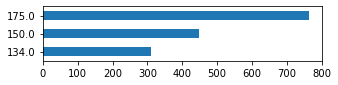

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    384
175.0    579
Name: Pack_Size, dtype: int64


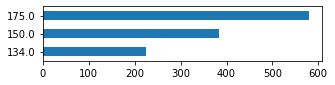

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1750
175.0    2747
Name: Pack_Size, dtype: int64


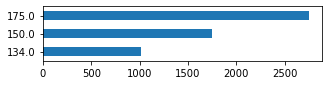

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3708
175.0    5662
Name: Pack_Size, dtype: int64


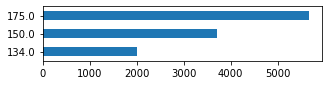

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2261
175.0    3489
Name: Pack_Size, dtype: int64


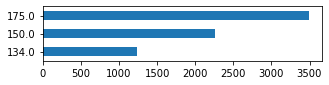

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2854
175.0    4382
Name: Pack_Size, dtype: int64


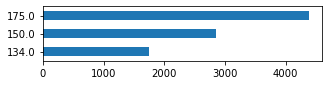

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2899
175.0    4535
Name: Pack_Size, dtype: int64


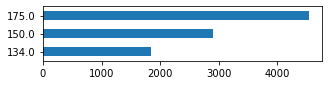

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2875
175.0    4422
Name: Pack_Size, dtype: int64


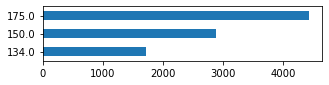

========== RETIREES - Premium ==========
134.0    1331
150.0    2015
175.0    3232
Name: Pack_Size, dtype: int64


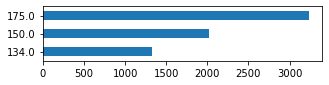

========== RETIREES - Budget ==========
134.0    1517
150.0    2381
175.0    3768
Name: Pack_Size, dtype: int64


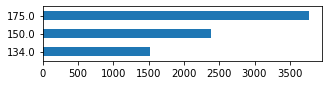

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3415
175.0    5187
Name: Pack_Size, dtype: int64


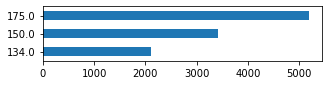

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1832
175.0    2926
Name: Pack_Size, dtype: int64


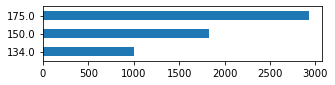

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2981
175.0    4800
Name: Pack_Size, dtype: int64


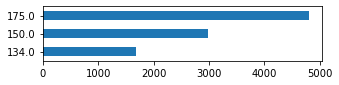

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    2101
175.0    3087
Name: Pack_Size, dtype: int64


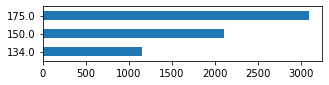

In [59]:
# Concatenate the pack_sizes information with the merged_data
merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

# Iterate through unique life stages and premium customer groups
for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========', stage, '-', prem, '==========')
        
        # Extract data for the current life stage and premium customer group
        segment_data = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]
        
        # Display and plot the top 3 pack size preferences for the segment
        summary = segment_data["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

In [60]:
# Calculate the total quantity of products purchased for each segment
total_qty_per_segment = temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum()

# Calculate the total number of loyalty cards for each segment
total_loyalty_cards_per_segment = temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()

# Calculate the average quantity of products per loyalty card for each segment
average_qty_per_card_per_segment = total_qty_per_segment / total_loyalty_cards_per_segment

# Display the result
print(average_qty_per_card_per_segment)

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              6.313830
                        Mainstream          6.796108
                        Premium             6.386672
NEW FAMILIES            Budget              5.009892
                        Mainstream          5.087161
                        Premium             5.028912
OLDER FAMILIES          Budget              9.639572
                        Mainstream          9.804309
                        Premium             9.578091
OLDER SINGLES/COUPLES   Budget              7.145466
                        Mainstream          7.098783
                        Premium             7.154947
RETIREES                Budget              6.458015
                        Mainstream          6.253743
                        Premium             6.426653
YOUNG FAMILIES          Budget              9.238486
                        Mainstream          9.180352
                        Premium             9.209207
YOUNG

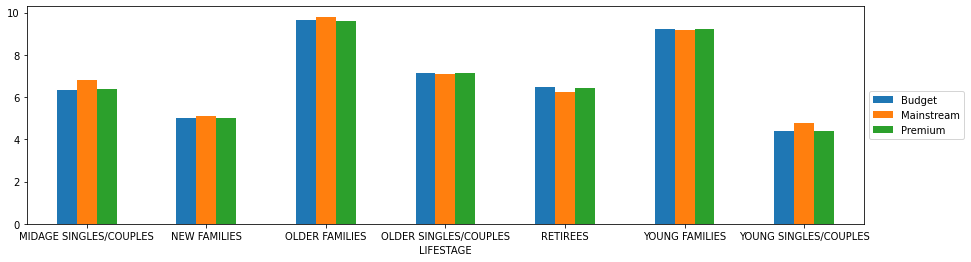

In [61]:
# Group data by LIFESTAGE and PREMIUM_CUSTOMER, then calculate the sum of PROD_QTY for each group
total_quantity_per_segment = temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum()

# Group data by LIFESTAGE and PREMIUM_CUSTOMER, then calculate the number of unique LYLTY_CARD_NBR for each group
unique_cards_per_segment = temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()

# Calculate the average purchase quantity per segment by dividing total quantity by the number of unique cards
average_quantity_per_segment = total_quantity_per_segment / unique_cards_per_segment

# Unstack the data to create a bar plot
average_quantity_per_segment.unstack().plot.bar(figsize=(15, 4), rot=0)

# Add a legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Save the plot as an image file
plt.savefig("Average_purchase_quantity_per_segment.png", bbox_inches="tight")

# Display the plot
plt.show()

In [62]:
# Calculate the unit price for each transaction by dividing total sales by product quantity
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]

# Group data by the "Segment" and calculate the mean unit price for each segment
average_unit_price_per_segment = temp.groupby(["Segment"]).mean()["Unit_Price"]

# Sort the results in descending order to identify segments with the highest average unit price
sorted_average_unit_price = average_unit_price_per_segment.sort_values(ascending=False)

# Display the sorted average unit prices per segment
sorted_average_unit_price

Segment
YOUNG SINGLES/COUPLES - Mainstream     4.071485
MIDAGE SINGLES/COUPLES - Mainstream    4.000101
RETIREES - Budget                      3.924883
RETIREES - Premium                     3.921323
NEW FAMILIES - Budget                  3.919251
NEW FAMILIES - Mainstream              3.916581
OLDER SINGLES/COUPLES - Premium        3.887220
OLDER SINGLES/COUPLES - Budget         3.877022
NEW FAMILIES - Premium                 3.871743
RETIREES - Mainstream                  3.833343
OLDER SINGLES/COUPLES - Mainstream     3.803800
YOUNG FAMILIES - Budget                3.753659
MIDAGE SINGLES/COUPLES - Premium       3.752915
YOUNG FAMILIES - Premium               3.752402
OLDER FAMILIES - Budget                3.733344
MIDAGE SINGLES/COUPLES - Budget        3.728496
OLDER FAMILIES - Mainstream            3.727383
YOUNG FAMILIES - Mainstream            3.707097
OLDER FAMILIES - Premium               3.704625
YOUNG SINGLES/COUPLES - Premium        3.645518
YOUNG SINGLES/COUPLES - Budget  

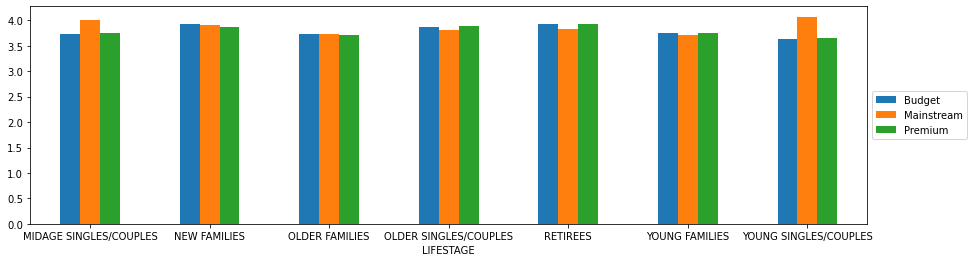

In [63]:
# Group data by "LIFESTAGE" and "PREMIUM_CUSTOMER," then calculate the mean unit price for each group
mean_unit_price_by_segment = temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"]

# Unstack the results to create a bar plot for each "PREMIUM_CUSTOMER" within each "LIFESTAGE"
mean_unit_price_by_segment.unstack().plot.bar(figsize=(15, 4), rot=0)

# Add a legend to the plot for better readability
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [66]:
# Group data by "Segment" and "Cleaned_Brand_Names," then sum the total sales for each brand in each segment
sales_by_brand_and_segment = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"]

# Sort the results in descending order of total sales
sorted_sales_by_brand_and_segment = sales_by_brand_and_segment.sort_values(ascending=False).reset_index()

# Filter the results for the "YOUNG SINGLES/COUPLES - Mainstream" segment
young_singles_couples_mainstream_sales = sorted_sales_by_brand_and_segment[sorted_sales_by_brand_and_segment["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

# Display the sorted young singles couples mainstream sales
young_singles_couples_mainstream_sales

,Segment,Cleaned_Brand_Names,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
8,YOUNG SINGLES/COUPLES - Mainstream,Doritos,21705.9
23,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
24,YOUNG SINGLES/COUPLES - Mainstream,Smiths,15265.7
55,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
59,YOUNG SINGLES/COUPLES - Mainstream,Old,8180.4
65,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
73,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
74,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
92,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6


Trends and Insights:

The top three contributors to total sales are as follows:

Older Families (Budget) with $156,864 in total sales.
Young Singles/Couples (Mainstream) with $147,582 in total sales.
Retirees (Mainstream) with $145,169 in total sales.
Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream), which explains their high total sales. Despite Older Families not having the highest population, they exhibit the highest frequency of purchase, contributing to their significant total sales.

Older Families, followed by Young Families, has the highest average quantity of chips bought per purchase.

Within the Mainstream category, "Young and Midage Singles/Couples" show the highest spending on chips per purchase. The difference between Mainstream and non-Mainstream "Young and Midage Singles/Couples" is statistically significant.

The chips brand Kettle dominates every segment as the most purchased brand. Examining the second most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) compared to others (Smiths).

The most frequently purchased chip size is 175g, followed by the 150g chip size for all segments.

Views and Recommendations:

For Older Families:

Focus on the Budget segment, emphasizing frequent purchases.
Offer promotions to encourage increased frequency of purchase.
Leverage the strength of high quantity of chips purchased per visit by providing promotions to encourage buying more chips.
For Young Singles/Couples:

Concentrate on the Mainstream segment.
Collaborate with Doritos merchants for branding promotions tailored to "Young Singles/Couples - Mainstream."
Capitalize on the large population quantity by ensuring promotions reach them frequently.
For Retirees:

Target the Mainstream segment.
Allocate efforts to reach the significant population quantity with frequent promotions.
General Recommendations:

Acknowledge that Kettle is the most frequently purchased brand across all segments.
Consider promoting 175g (regardless of brand), followed by 150g, as the preferred chip sizes when conducting promotions targeting all segments.